In [1]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import load_model #Added import statement for load_model

from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input, BatchNormalization # Import BatchNormalization from keras.layers
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import keras
from keras.layers import Input, LSTM, Dense, BatchNormalization
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Read the CSV file
mitbih_train = pd.read_csv("/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/ECG Datasets/mitbih_train.csv")
mitbih_test = pd.read_csv("/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/ECG Datasets/mitbih_test.csv")




In [4]:
mitbih_train.shape

(87553, 188)

In [5]:
mitbih_test.shape

(21891, 188)

In [6]:
mitbih_train.head()


,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mitbih_test.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


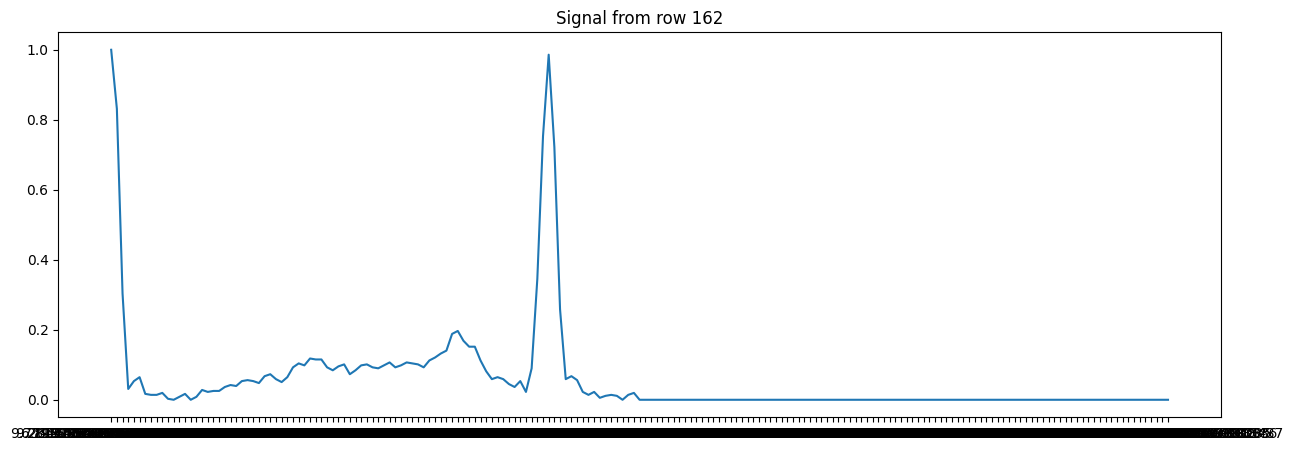

In [7]:
# Choose a row from mitbih_train and plot the signal

import matplotlib.pyplot as plt

#Chose a row from the dataframe
row = 162


# Extract the signal from the chosen row
ECG_signal = mitbih_train.iloc[row, : -1]

# Plot the signal
plt.figure(figsize=(15, 5))
plt.plot(ECG_signal)
plt.title(f"Signal from row {row}")
plt.show()


In [8]:
mitbih_train[187]=mitbih_train[mitbih_train.columns[187]].astype(int) # Use the correct column index from the DataFrame
balance=mitbih_train[mitbih_train.columns[187]].value_counts()
print(balance)

0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


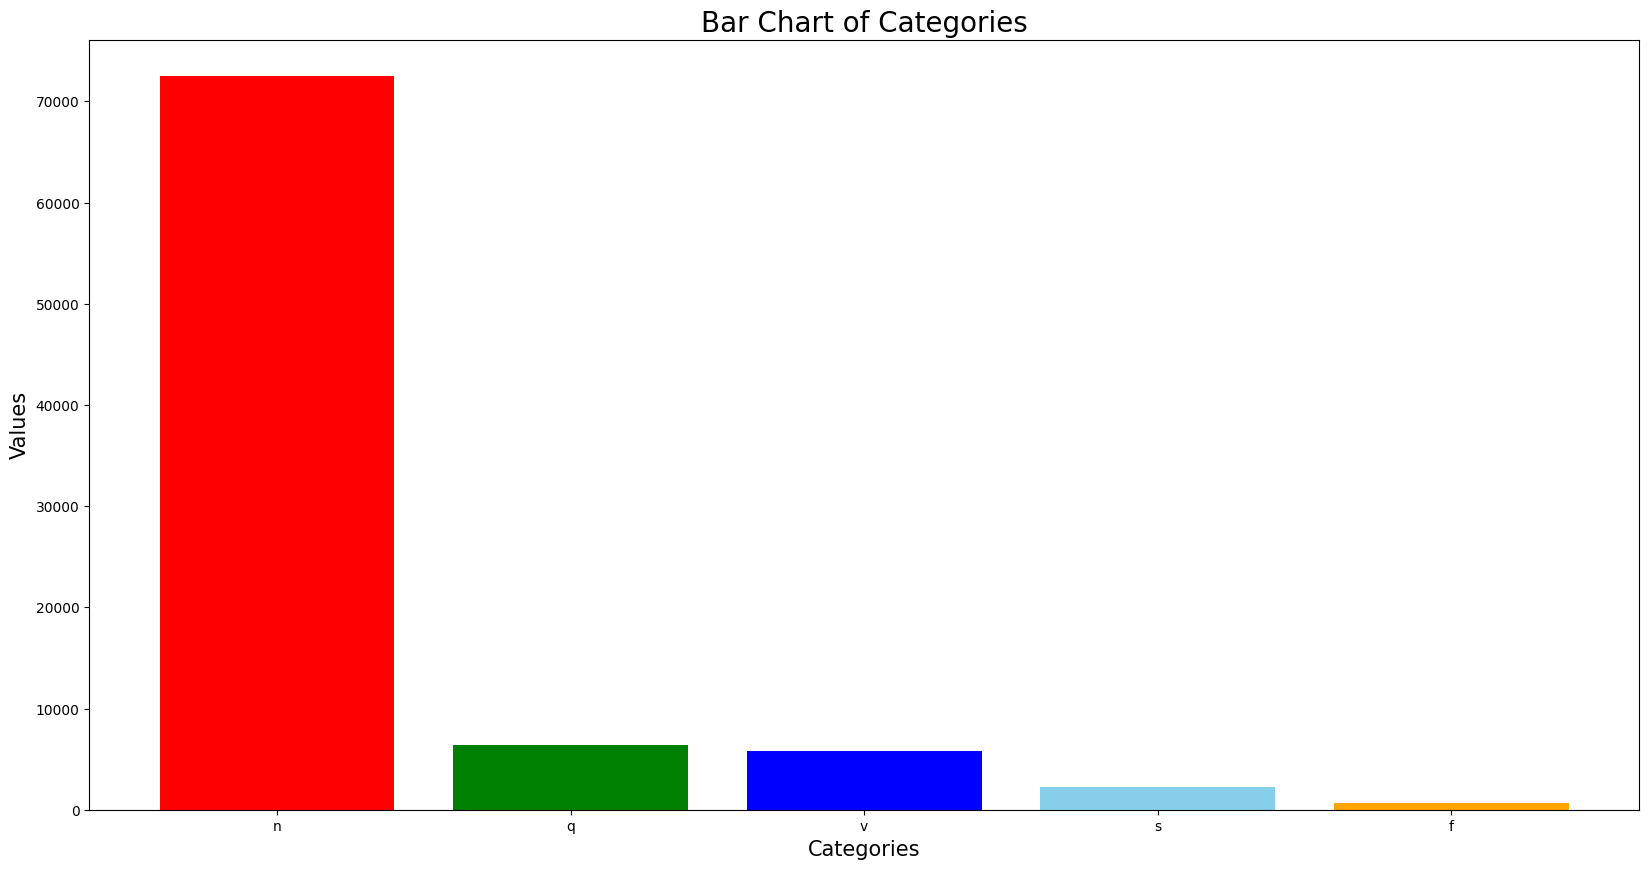

In [9]:
# Sample data
# 0 - “N” for normal heartbeats.
# 1 - “S” for supra-ventricular premature.
# 2 - “V” for ventricular escape.
# 3 - “F” for fusion of ventricular and normal.
# 4 - “Q” for unclassified heartbeats

labels = ['n', 'q', 'v', 's', 'f']
colors = ['red', 'green', 'blue', 'skyblue', 'orange']

# Create a figure with a specific size
plt.figure(figsize=(20, 10))

# Create a bar chart
plt.bar(labels, balance, color=colors)

# Add titles and labels
plt.title('Bar Chart of Categories', fontsize=20)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Values', fontsize=15)

# Display the chart
plt.show()


In [10]:
#Reorganize data to balance samples

from sklearn.utils import resample
df_1=mitbih_train[mitbih_train[187]==1]
df_2=mitbih_train[mitbih_train[187]==2]
df_3=mitbih_train[mitbih_train[187]==3]
df_4=mitbih_train[mitbih_train[187]==4]
df_0=(mitbih_train[mitbih_train[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

mitbih_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [11]:
balance=mitbih_train_df[187].value_counts()
print(balance)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


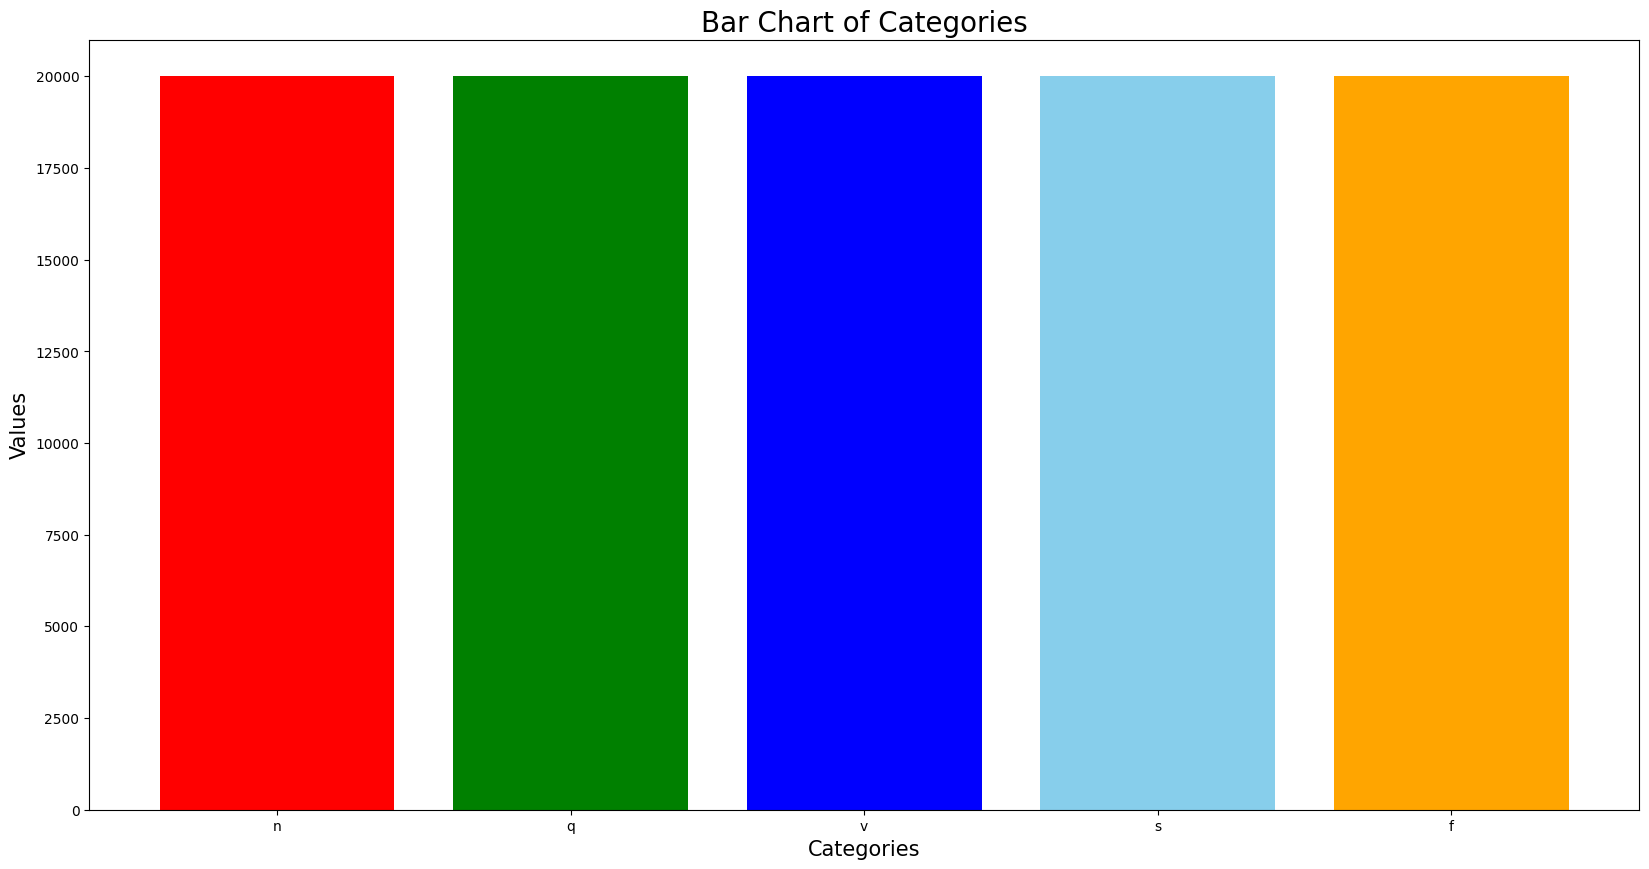

In [12]:
# Sample data

labels = ['n', 'q', 'v', 's', 'f']
colors = ['red', 'green', 'blue', 'skyblue', 'orange']

# Create a figure with a specific size
plt.figure(figsize=(20, 10))

# Create a bar chart
plt.bar(labels, balance, color=colors)

# Add titles and labels
plt.title('Bar Chart of Categories', fontsize=20)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Values', fontsize=15)

# Display the chart
plt.show()

In [13]:
#Display table with some examples
examples=mitbih_train_df.groupby(187,group_keys=False).apply(lambda mitbih_train_df : mitbih_train_df.sample(1))
examples

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88,187
38421,0.923894,0.798230,0.553982,0.288496,0.074336,0.023009,0.056637,0.081416,0.097345,0.093805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74079,0.947020,0.728477,0.201987,0.076159,0.139073,0.182119,0.135762,0.155629,0.201987,0.192053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
78841,1.000000,0.901141,0.874525,0.730038,0.608365,0.558935,0.517110,0.463878,0.479087,0.399240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2
80996,1.000000,0.803468,0.453757,0.317919,0.219653,0.138728,0.092486,0.083815,0.089595,0.069364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3
82241,1.000000,0.558304,0.583039,0.586572,0.583039,0.565371,0.533569,0.466431,0.335689,0.212014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4


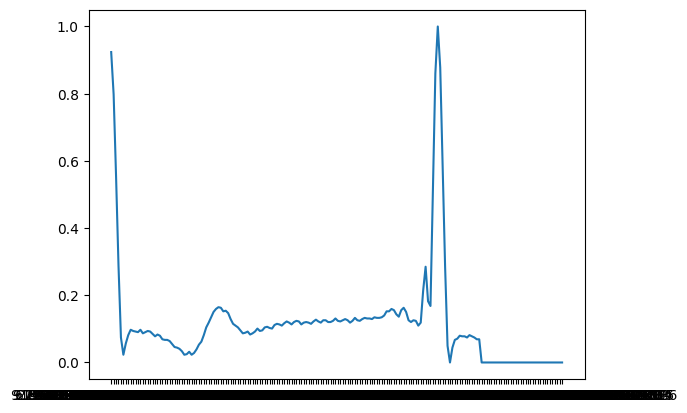

In [14]:
 plt.plot(examples.iloc[0,:186])

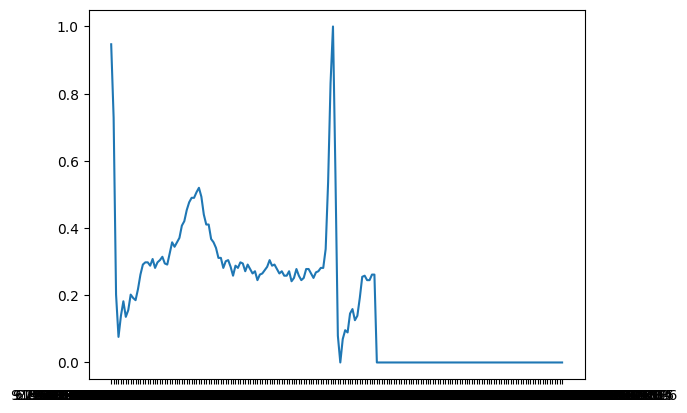

In [15]:
 plt.plot(examples.iloc[1,:186])

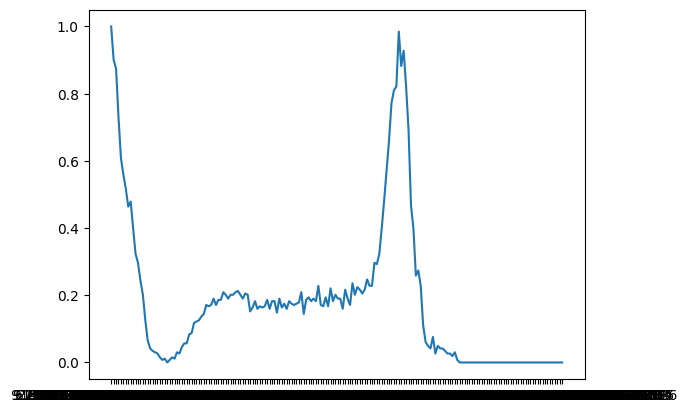

In [16]:
 plt.plot(examples.iloc[2,:186])

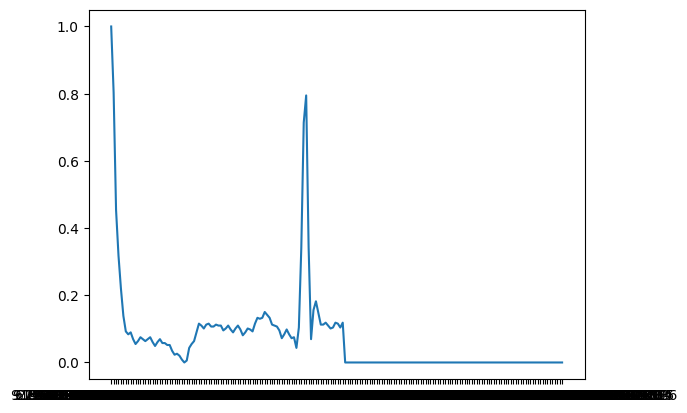

In [17]:
 plt.plot(examples.iloc[3,:186])

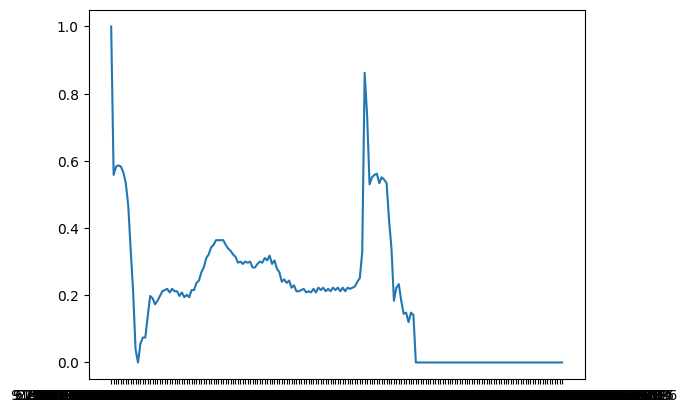

In [18]:
 plt.plot(examples.iloc[4,:186])

In [19]:
target_train = mitbih_train_df.iloc[:, 187] # Select column at index 187
mitbih_test_df = mitbih_test
target_test = mitbih_test_df.iloc[:, 187] # Select column at index 187

y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [20]:
X_train=mitbih_train_df.iloc[:,:186].values
X_test=mitbih_test_df.iloc[:,:186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [21]:
#Create and store CNN model and history metrics

def CNN_model(X_train, y_train, X_test, y_test):
    im_shape = (X_train.shape[1], 1)
    inputs_cnn = Input(shape=(im_shape), name='inputs_cnn')

    # First Convolutional Layer
    conv1 = Convolution1D(32, (6), activation='relu')(inputs_cnn)
    pool1 = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv1)

    # Second Convolutional Layer
    conv2 = Convolution1D(32, (3), activation='relu')(pool1)
    pool2 = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2)

    # Flatten and Dense Layers
    flatten = Flatten()(pool2)
    dense1 = Dense(32, activation='relu')(flatten)
    main_output = Dense(5, activation='softmax', name='main_output')(dense1)  # Output layer for binary classification

    # Compile the model
    model = Model(inputs=inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and model checkpointing
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3),
        ModelCheckpoint(filepath='/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/best_model_CNN.keras', monitor='val_loss', save_best_only=True)
    ]

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))

    # Save the final model
    model.save('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/cnn_model.keras')

    # Save the training history to a JSON file
    with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/cnn_training_history.json', 'w') as f:
        json.dump(history.history, f)

    return model, history


In [22]:
#Create and store LSTM model and history metrics
def LSTM_model(X_train, y_train, X_test, y_test):
    timesteps = X_train.shape[1]
    input_dim = X_train.shape[2]

    inputs_lstm = Input(shape=(timesteps, input_dim), name='inputs_lstm')
    lstm1 = LSTM(64, return_sequences=True)(inputs_lstm)
    lstm1 = BatchNormalization()(lstm1)
    lstm2 = LSTM(64)(lstm1)
    lstm2 = BatchNormalization()(lstm2)
    dense_end1 = Dense(64, activation='relu')(lstm2)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs=inputs_lstm, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=8),
        ModelCheckpoint(filepath='/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/best_model_LSTM.keras', monitor='val_loss', save_best_only=True)
    ]

    history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))

    # Save the entire model to a file
    model.save('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/final_lstm_model.keras')  # Save the model architecture, weights, and optimizer state

    # Save the training history to a JSON file
    with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/lstm_training_history.json', 'w') as f:
        json.dump(history.history, f)

    return model, history


In [23]:
#Transformer model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_transformer_model(input_shape, num_classes, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], dropout=0.1):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)  # Removed data_format="channels_first"
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

# Example to compile, train, save the model and history
def train_and_save_transformer_model(X_train, y_train, X_test, y_test, input_shape, num_classes):
    model = build_transformer_model(input_shape, num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8),
        tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/best_transformer_model.keras', monitor='val_loss', save_best_only=True)
    ]

    history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))


    # Save the entire model to a file
    model.save('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/final_transformer_model.keras')  # Save the model architecture, weights, and optimizer state

    # Save the training history to a JSON file
    with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/transformer_training_history.json', 'w') as f:
        json.dump(history.history, f)

    return model, history




In [ ]:

# Train and get predictions from the CNN model
cnn_model, cnn_history = CNN_model(X_train, y_train, X_test, y_test)


Epoch 1/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.7987 - loss: 0.5612 - val_accuracy: 0.8638 - val_loss: 0.3923
Epoch 2/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9275 - loss: 0.2061 - val_accuracy: 0.9297 - val_loss: 0.2122
Epoch 3/3
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9527 - loss: 0.1396 - val_accuracy: 0.9225 - val_loss: 0.2383


In [ ]:
# Load the model for Binary classification from the file
cnn_model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/final_cnn_model.keras')

In [ ]:
# Add epochs to saved model
cnn_new_history = cnn_model.fit(X_train, y_train,
                    epochs=2,  # Set the number of additional epochs
                    validation_data=(X_test, y_test))

Epoch 1/2
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 119s 37ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9742 - val_loss: 0.1655
Epoch 2/2
 242/3125 ━━━━━━━━━━━━━━━━━━━━ 1:36 34ms/step - accuracy: 0.9961 - loss: 0.0127

KeyboardInterrupt: 

In [ ]:
# Save the updated CNN model
cnn_model.save('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/final_cnn_model.keras')

685/685 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
CNN Model metrics:
Accuracy: 0.9674
Precision: 0.9717
Recall: 0.9674
F1 Score: 0.9689


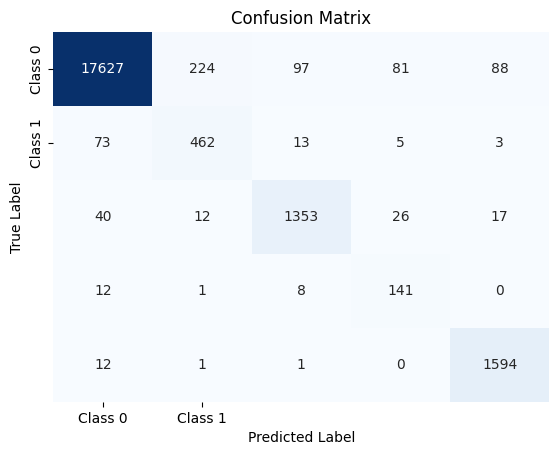

In [24]:
# Load the model from the file
model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/final_cnn_model.keras')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print metrics
print(f'CNN Model metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Load the previous history
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/cnn_training_history.json', 'r') as f:
    history = json.load(f)

# Merge old and new histories
for key in history.keys():
    history[key].extend(cnn_new_history.history[key])

# Save the updated history back to the JSON file
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/cnn_training_history.json', 'w') as f:
    json.dump(history, f)

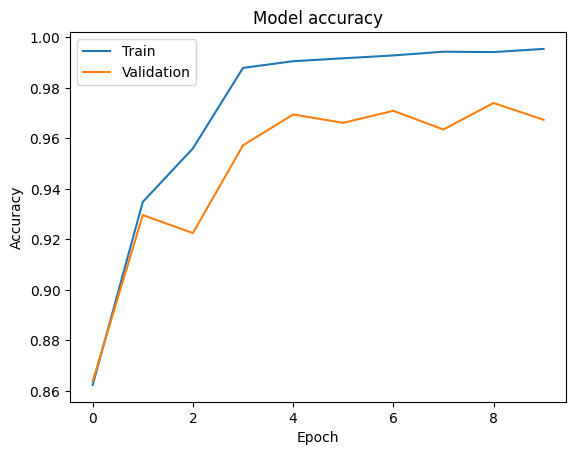

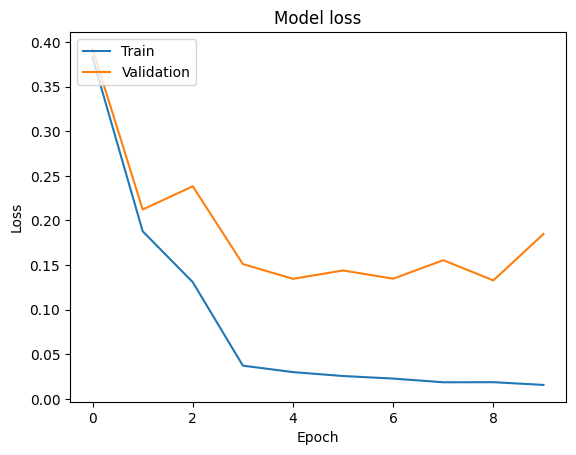

,accuracy,loss,val_accuracy,val_loss
Epoch,,,,
1,0.8624,0.3825,0.8638,0.3923
2,0.9349,0.1878,0.9297,0.2122
3,0.9560,0.1308,0.9225,0.2383
4,0.9879,0.0372,0.9573,0.1511
5,0.9906,0.0300,0.9695,0.1346
6,0.9918,0.0256,0.9662,0.1439
7,0.9929,0.0227,0.9709,0.1347
8,0.9944,0.0185,0.9635,0.1554
9,0.9942,0.0187,0.9741,0.1327


In [26]:

# Load the history from the JSON file
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/cnn_training_history.json', 'r') as f:
    history = json.load(f)

# Now you can use the history for plotting or analysis
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Convert the history data into a pandas DataFrame
cnn_history_df = pd.DataFrame(history)

# Set the epoch number as index
cnn_history_df.index += 1  # Start epochs from 1 instead of 0
cnn_history_df.index.name = 'Epoch'

# Format the DataFrame to display four decimal places
cnn_formatted_history_df = cnn_history_df.round(4)

# Display the DataFrame
display(cnn_formatted_history_df)

In [ ]:
# Train and get predictions from the LSTM model
lstm_model, lstm_history = LSTM_model(X_train, y_train, X_test, y_test)


In [ ]:
# Load the model for Binary classification from the file
lstm_model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/final_lstm_model.keras')

In [ ]:
# Add epochs to saved model
lstm_new_history = cnn_model.fit(X_train, y_train,
                    epochs=2,  # Set the number of additional epochs
                    validation_data=(X_test, y_test))

Epoch 1/2
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 128s 41ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9764 - val_loss: 0.1427
Epoch 2/2
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 143s 42ms/step - accuracy: 0.9969 - loss: 0.0100 - val_accuracy: 0.9576 - val_loss: 0.2622


In [ ]:
# Save the updated CNN model
lstm_model.save('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/final_lstm_model.keras')

685/685 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step
LSTM Model metrics:
Accuracy: 0.7920
Precision: 0.9321
Recall: 0.7920
F1 Score: 0.8472


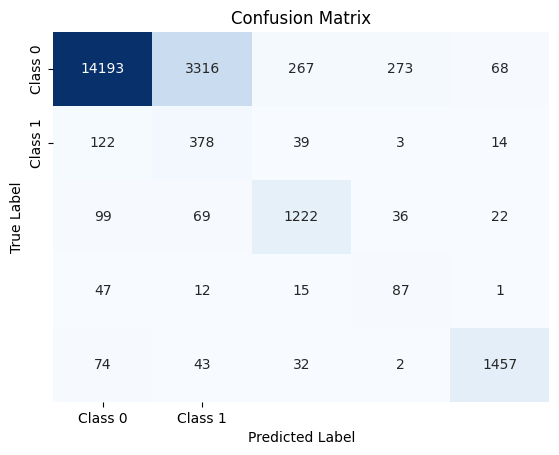

In [27]:
# Load the model from the file
model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/final_lstm_model.keras')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print metrics
print(f'LSTM Model metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Load the previous history
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/lstm_training_history.json', 'r') as f:
    history = json.load(f)

# Merge old and new histories
for key in history.keys():
    history[key].extend(cnn_new_history.history[key])

# Save the updated history back to the JSON file
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/lstm_training_history.json', 'w') as f:
    json.dump(history, f)

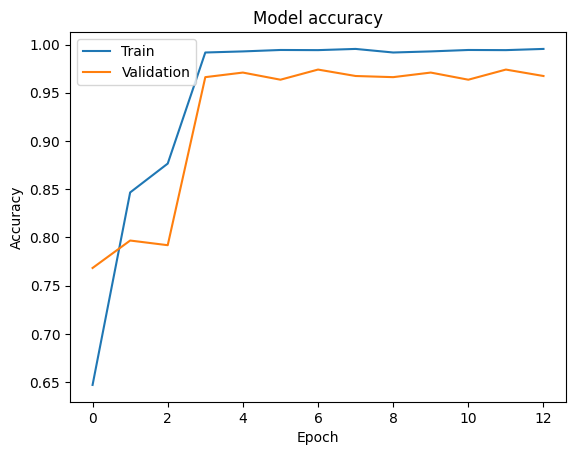

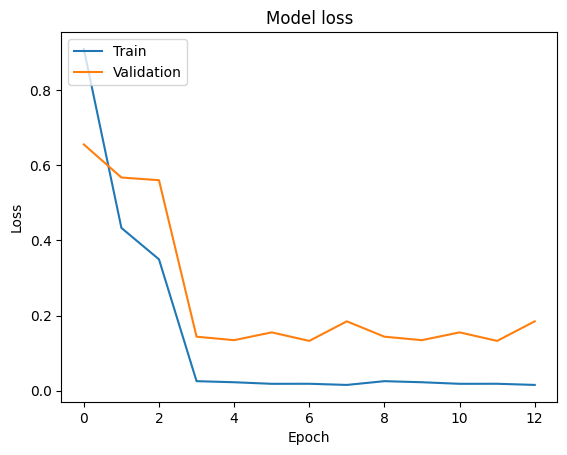

,accuracy,loss,val_accuracy,val_loss
Epoch,,,,
1,0.6471,0.9097,0.7684,0.6556
2,0.8467,0.4334,0.7968,0.5676
3,0.8766,0.3498,0.7920,0.5604
4,0.9918,0.0256,0.9662,0.1439
5,0.9929,0.0227,0.9709,0.1347
6,0.9944,0.0185,0.9635,0.1554
7,0.9942,0.0187,0.9741,0.1327
8,0.9955,0.0156,0.9674,0.1848
9,0.9918,0.0256,0.9662,0.1439


In [28]:

# Load the history from the JSON file
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/lstm_training_history.json', 'r') as f:
    history = json.load(f)


import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Convert the history data into a pandas DataFrame
lstm_history_df = pd.DataFrame(history)

# Set the epoch number as index
lstm_history_df.index += 1  # Start epochs from 1 instead of 0
lstm_history_df.index.name = 'Epoch'

# Format the DataFrame to display four decimal places
lstm_formatted_history_df = lstm_history_df.round(4)

# Display the DataFrame
display(lstm_formatted_history_df)

In [29]:
# Define and train the Transformer model
#transformer_model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=5)
#transformer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
input_shape=(X_train.shape[1], X_train.shape[2])
num_classes=5


In [ ]:
model, history = train_and_save_transformer_model(X_train, y_train, X_test, y_test, input_shape, num_classes)

Epoch 1/10


SystemError: ../Objects/listobject.c:336: bad argument to internal function

685/685 ━━━━━━━━━━━━━━━━━━━━ 665s 968ms/step
Transformer Model metrics:
Accuracy: 0.1687
Precision: 0.7769
Recall: 0.1687
F1 Score: 0.2184


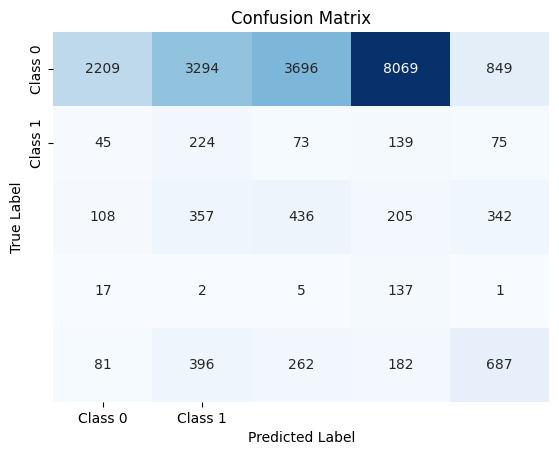

In [30]:
# Load the model from the file
#model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/final_transformer_model_binary.keras', safe_mode=True)

input_shape=(X_train.shape[1], X_train.shape[2])
num_classes=5

model = build_transformer_model(input_shape, num_classes)
model.load_weights('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/final_transformer_model.keras (Unzipped Files)/model.weights.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print metrics
print(f'Transformer Model metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

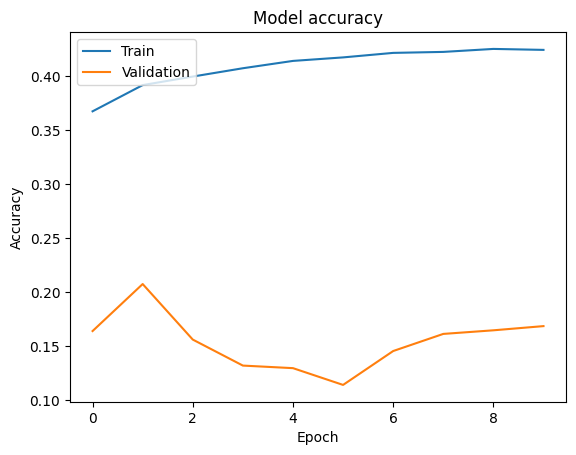

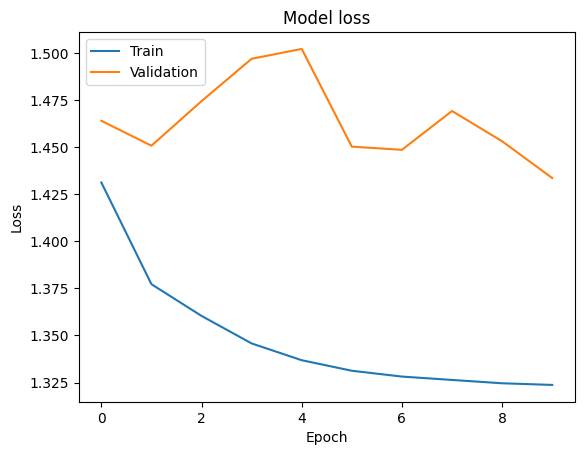

       loss  accuracy  val_loss  val_accuracy
0  1.431315   0.36757  1.464106      0.164124
1  1.377262   0.39185  1.450849      0.207656
2  1.360402   0.39976  1.474539      0.156221
3  1.345773   0.40746  1.497049      0.132149
4  1.336857   0.41425  1.502286      0.129773
5  1.331258   0.41750  1.450345      0.114243
6  1.328164   0.42168  1.448668      0.145624
7  1.326375   0.42259  1.469301      0.161475
8  1.324605   0.42535  1.453208      0.164809
9  1.323728   0.42446  1.433675      0.168692


,loss,accuracy,val_loss,val_accuracy
Epoch,,,,
1,1.4313,0.3676,1.4641,0.1641
2,1.3773,0.3918,1.4508,0.2077
3,1.3604,0.3998,1.4745,0.1562
4,1.3458,0.4075,1.4970,0.1321
5,1.3369,0.4142,1.5023,0.1298
6,1.3313,0.4175,1.4503,0.1142
7,1.3282,0.4217,1.4487,0.1456
8,1.3264,0.4226,1.4693,0.1615
9,1.3246,0.4254,1.4532,0.1648


In [31]:

# Load the history from the JSON file
with open('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/transformer_training_history.json', 'r') as f:
    history = json.load(f)

# Now you can use the history for plotting or analysis
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Convert the history data into a pandas DataFrame
transformer_history_df = pd.DataFrame(history)

# Display the DataFrame as a table
print(transformer_history_df)

# Set the epoch number as index
transformer_history_df.index += 1  # Start epochs from 1 instead of 0
transformer_history_df.index.name = 'Epoch'

# Format the DataFrame to display four decimal places
transformer_formatted_history_df = transformer_history_df.round(4)

# Display the DataFrame
display(transformer_formatted_history_df)

In [33]:
# Create the bagging ensemble by averaging the predictions

# Load the models from the files
cnn_model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/CNN/final_cnn_model.keras')

lstm_model = load_model('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/LSTM/final_lstm_model.keras')

transformer_model = build_transformer_model(input_shape, num_classes)
model.load_weights('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Transformer/final_transformer_model.keras (Unzipped Files)/model.weights.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_pred = cnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
transformer_pred = transformer_model.predict(X_test)

ensemble_multi_predictions = np.mean([cnn_pred, lstm_pred, transformer_pred], axis=0)


685/685 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 701s 1s/step


In [ ]:
# Convert predictions to class labels
y_pred_classes = np.argmax(ensemble_multi_predictions, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate the ensemble model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Bagging Ensemble Model metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}')



Bagging Ensemble Model metrics:
Accuracy: 0.9578
Precision: 0.9683
Recall: 0.9578
F1 Score: 0.9616


In [ ]:
# Save predictions as a numpy array
np.save('/content/drive/MyDrive/UWTSD_MSc_SE_and_AI/Dissertation/Code/Bagging-Based model/ensemble_multi_predictions.npy', ensemble_multi_predictions)

NameError: name 'ensemble_multi_predictions' is not defined